In [ ]:
import pandas as pd
import numpy as np

In [ ]:
columns = ["label", "text"]

In [ ]:
train_df = pd.read_csv("data/fulltrain.csv", names=columns)
train_df.head()

,label,text
0,1,"A little less than a decade ago, hockey fans w..."
1,1,The writers of the HBO series The Sopranos too...
2,1,Despite claims from the TV news outlet to offe...
3,1,After receiving 'subpar' service and experienc...
4,1,After watching his beloved Seattle Mariners pr...


In [ ]:
train_df.shape

(48854, 2)

In [ ]:
test_df = pd.read_csv("data/balancedtest.csv", names=columns)
test_df.head()

,label,text
0,1,When so many actors seem content to churn out ...
1,1,In what football insiders are calling an unex...
2,1,In a freak accident following Game 3 of the N....
3,1,North Koreas official news agency announced to...
4,1,The former Alaska Governor Sarah Palin would b...


In [ ]:
test_df.shape

(3000, 2)

Preprocessing (Tokenization, Lemmatization, StopWordRemoval)

In [ ]:
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords, wordnet

In [ ]:
nltk.download('wordnet')
nltk_stopwords = list(stopwords.words('english'))

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ngchisern/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

# without lemmatization, normalization, and stop words removal
lemmatizer = WordNetLemmatizer()
def tokenize(text):
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens if token not in nltk_stopwords]
    
    return " ".join(tokens)

In [ ]:
import time

start = time.time()
minute = 0

for i in range(train_df.shape[0]):
    if time.time() - start >= minute * 60:
        print(str(minute) + " minutes: " + str(i) + " iterations done.")
        minute += 1
    train_df.at[i, "text"] = tokenize(train_df.at[i, "text"])

0 minutes: 0 iterations done.
1 minutes: 2053 iterations done.
2 minutes: 3862 iterations done.
3 minutes: 5469 iterations done.
4 minutes: 7039 iterations done.
5 minutes: 8438 iterations done.
6 minutes: 9933 iterations done.
7 minutes: 11415 iterations done.
8 minutes: 12601 iterations done.
9 minutes: 13739 iterations done.
10 minutes: 15434 iterations done.
11 minutes: 17296 iterations done.
12 minutes: 19016 iterations done.
13 minutes: 20730 iterations done.
14 minutes: 21321 iterations done.
15 minutes: 21665 iterations done.
16 minutes: 21979 iterations done.
17 minutes: 22318 iterations done.
18 minutes: 22672 iterations done.
19 minutes: 23003 iterations done.
20 minutes: 23342 iterations done.
21 minutes: 23687 iterations done.
22 minutes: 24013 iterations done.
23 minutes: 24342 iterations done.
24 minutes: 24675 iterations done.
25 minutes: 24985 iterations done.
26 minutes: 25281 iterations done.
27 minutes: 25589 iterations done.
28 minutes: 25920 iterations done.
29 mi

In [ ]:
train_df.head()

,label,text
0,1,"A little less decade ago , hockey fan bless sl..."
1,1,The writer HBO series The Sopranos take anothe...
2,1,Despite claim TV news outlet offer 'nonstop ne...
3,1,After receive 'subpar ' service experience unu...
4,1,After watch beloved Seattle Mariners prevail S...


In [ ]:
for i in range(test_df.shape[0]):
    if i % 300 == 0:
        print(str(i) + " iterations done.")
    test_df.at[i, "text"] = tokenize(test_df.at[i, "text"])

0 iterations done.
300 iterations done.
600 iterations done.
900 iterations done.
1200 iterations done.
1500 iterations done.
1800 iterations done.
2100 iterations done.
2400 iterations done.
2700 iterations done.


In [ ]:
test_df.head()

,label,text
0,1,When many actor seem content churn performance...
1,1,In football insider call unexpectedly severe p...
2,1,In freak accident follow Game 3 N.B.A . Finals...
3,1,North Koreas official news agency announce tod...
4,1,The former Alaska Governor Sarah Palin would b...


Bag of Words

In [ ]:
from sklearn.model_selection import train_test_split

X, Y = train_df['text'], train_df['label']
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer(max_features=1000, ngram_range=(1,3))
bow = cv.fit_transform(X_train)

In [ ]:
bow.shape

(39083, 1000)

In [ ]:
X_train = bow
X_valid = cv.transform(X_valid)

In [ ]:
X_train

<39083x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 4070945 stored elements in Compressed Sparse Row format>

In [ ]:
X_valid

<9771x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 1013301 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf=LogisticRegression()
clf.fit(X_train, y_train)

pred = clf.predict(X_valid)

/Users/ngchisern/Downloads/project/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

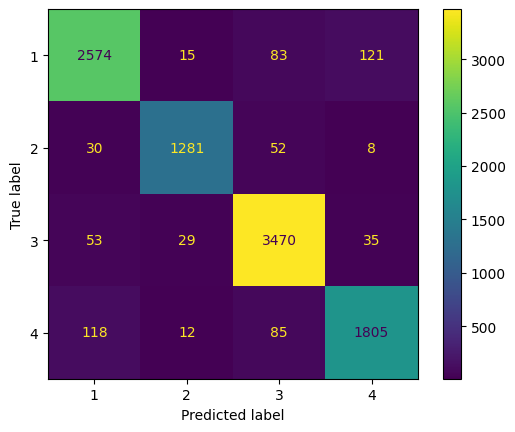

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_valid, pred)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_valid, pred)
print(confusion_matrix(y_valid, pred))
print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")
print(classification_report(y_valid, pred))

[[2574   15   83  121]
 [  30 1281   52    8]
 [  53   29 3470   35]
 [ 118   12   85 1805]]
TN: [2574   15   83  121], FP: [  30 1281   52    8], FN: [  53   29 3470   35], TP: [ 118   12   85 1805]
              precision    recall  f1-score   support

           1       0.93      0.92      0.92      2793
           2       0.96      0.93      0.95      1371
           3       0.94      0.97      0.95      3587
           4       0.92      0.89      0.90      2020

    accuracy                           0.93      9771
   macro avg       0.94      0.93      0.93      9771
weighted avg       0.93      0.93      0.93      9771



In [ ]:
X_test = cv.transform(test_df['text'])
y_test = test_df['label']

test_pred = clf.predict(X_test)

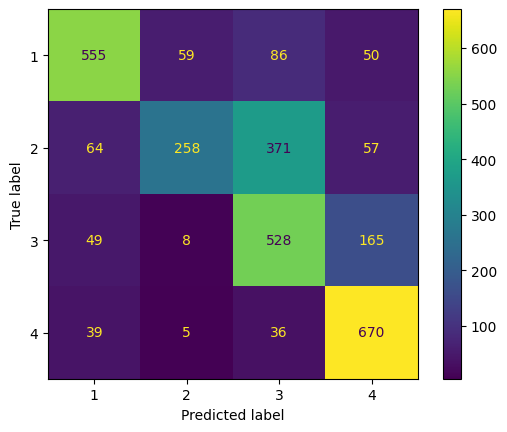

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, test_pred)

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_valid, pred)
print(confusion_matrix(y_valid, pred))
print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")
print(classification_report(y_test, test_pred))

[[2574   15   83  121]
 [  30 1281   52    8]
 [  53   29 3470   35]
 [ 118   12   85 1805]]
TN: [2574   15   83  121], FP: [  30 1281   52    8], FN: [  53   29 3470   35], TP: [ 118   12   85 1805]
              precision    recall  f1-score   support

           1       0.79      0.74      0.76       750
           2       0.78      0.34      0.48       750
           3       0.52      0.70      0.60       750
           4       0.71      0.89      0.79       750

    accuracy                           0.67      3000
   macro avg       0.70      0.67      0.66      3000
weighted avg       0.70      0.67      0.66      3000

